# Project 1 - Iowa Liquor 

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year. 

Your task is as follows:

* Calculate the yearly liquor sales for each store using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.
* Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of all stores. You must use the sales from Jan to March as one of your variables.
* Use your model for 2015 to estimate total sales in 2016, extrapolating from the sales so far for Jan-March of 2016.
* Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.
* Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.
* Fit your model(s) using one or both of the regularization tactics covered. Explain whether the regularized or the non-regularized model performed better and what the selected regression(s) are doing.



# Part 1

### Data Cleaning and EDA

In Part 1 of this two-part project, you will apply the skills you have learned manipulating data in Python with Pandas, Numpy, Matplotlib, Seaborn and other tools to import the Iowa Liquor data, clean the dataset, then perform exploratory analysis using visual and statistical methods.

### Requirements:

**Identify the problem**
- Write a high quality problem statement
- Describe the goals of your study and criteria for success

**Acquire and clean the data**
- Verify the dataset is in the 'Assets' folder of this project - the data is from [Iowa.gov](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), filtered and
reduced
- Import data using the Pandas Library
- Format, clean, slice, and combine the data in Python

**Explore the data**
- Perform exploratory analysis methods with visualization and statistical analysis
- Determine outliers, skew distribution of important variables (if any)
- Determine correlations / causations in the data
- State the risks and assumptions of your data
- Identify 5 relationships, trends, or other intersting attributes of the data set

# Identify the Problem

The goal of this two-part project is to build a model predicting future sales. Write a problem statement and identify SMART goals 

### Problem Statement

To predict and maximize Iowa tax revenue from sales of alcoholic beverages. Understand and quantify a relationship between Iowa tax rates and alcoholic beverage consumption. Under an assumption that there is some maximization function of Iowa's excise and liquor state tax (cite: https://www.salestaxhandbook.com/iowa/alcohol), is Iowa maximizing its tax revenue function?        

### SMART Goals

Using the provided sample Iowa alcoholic beverages sales data for FY2015, calculate total government tax revenue for total liquor sales. Calculate an OLS regression with tax revenue on the LHS, and excise tax rate, liquor purchase volume, and month of year on the RHS. Results will inform how much Iowa receives for each sale of liquor, given a certain tax rate and season. Will see if Iowa has "room" to increase excise tax rate, and if Iowa has the ability to decrease consumption through its tax rates.               


# Download Data



If you navigate to the [data.iowa.gov](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) page for the liquor sales data and click "download" - you'll end up with a 3.4GB/12.6 million row file containing all transactions by product for every class-E liquor store in the state since January 1, 2012

For this project, we are providing a trimmed version of this dataset which contains a sample of the data. If you would like to try using a larger sample of the data, reach out to John or Joseph


** The folowing code verifies that the dataset is in the right location **

If the code below returns 'false' - reach out to your instructors.

In [2]:
import os

os.path.isfile('../Assets/Iowa_Liquor_sample.csv') 

True

In [3]:
import pandas as pd
import matplotlib as pl
import seaborn as sns

In [4]:
liquor=pd.read_csv('../Assets/Iowa_Liquor_sample.csv')

In [5]:
liquor['State Bottle Cost'] = liquor['State Bottle Cost'].apply(lambda x: x.replace('$',''))
liquor['State Bottle Retail'] = liquor['State Bottle Retail'].apply(lambda x: x.replace('$',''))
liquor['Sale (Dollars)'] = liquor['Sale (Dollars)'].apply(lambda x: x.replace('$',''))

liquor['State Bottle Cost'] = pd.to_numeric(liquor['State Bottle Cost'],errors='coerce')
liquor['State Bottle Retail'] = pd.to_numeric(liquor['State Bottle Retail'],errors='coerce')
liquor['Sale (Dollars)'] = pd.to_numeric(liquor['Sale (Dollars)'],errors='coerce')

# Load Data and Clean

Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [6]:
# import pandas as pd

## Load the data into a DataFrame
# liquor = pd.read_csv('../Assets/')


### Explore the head and tail

View the head and tail of the data set; take a look at the columns. 

Can you identify what each of the columns are describing? 

How many rows / columns are there in the dataset?

In [7]:
liquor.head()



,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [8]:
liquor.tail()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270950,12/22/2015,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,20.30,30.45,4,121.80,1.20,0.32
270951,11/04/2015,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,7.47,11.21,3,33.63,2.25,0.59
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,15.07,22.61,6,135.66,4.50,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,26.05,39.08,6,234.48,10.50,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,2.75,4.13,8,33.04,1.60,0.42


In [9]:
liquor.shape


(270955, 18)

There are 270955 observations, and 18 descriptor variables for each observation. Each observation is a transaction detail in Iowa, and lists an alcoholic item and its SKU. It observes where in Iowa, the volume of the beverage, what the beverage is, and its price.   

### Parse dates

Using '.dtypes' on our dataframe allows us to view the data type of each of our collumns. Pandas does its best to infer data types on ingest, but we may still need to make assumptions. [Pandas Dtype Basics](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [10]:
# use .dtypes on the liquor dataframe to view the data type of each column
liquor.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

Note that the 'Date' column has the dtype 'object' - this is the pandas data type designation for a string or a data type it doesn't recognise. 

We want our 'Date' column to be interpreted as datatime by pandas so we can perform time-based grouping and other functions on this column, so we have to convert it to a datetime datatype.

Pandas gives us some options:
- Adjust our pd.read_csv to infer datetimes on import
- Directly convert the date column

[Pandas pd.read_csv datetime handling documentation](https://pandas.pydata.org/pandas-docs/stable/io.html#datetime-handling)

[Pandas pd.to_datetime documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [11]:
# Option 1: adjust pd.read_csv
# df = pd.read_csv('file.csv',parse_dates=['date column'],infer_datetime_format=True)
liquor = pd.read_csv('../Assets/Iowa_Liquor_sample.csv',parse_dates=['Date'],infer_datetime_format=True)


In [12]:
liquor.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [13]:
# Option 2: convert the 'Date' column
liquor["Date"] = pd.to_datetime(liquor["Date"],errors='coerce',infer_datetime_format=True)


In [14]:
# check .dtypes agin
liquor.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

### Clean Column Names

Are there spaces in the column names? When columns have spaces in there name, it makes it difficult to use pandas in the form of df.column.method() (ie, liquor.City.value_counts)

For a multi-word column name, you would have to use df['Zip Code'] instead of df.ZipCode

Additionally, some of our columns have parantheses in their names. 

We can remove spaces and special characters from our columns, which will help keep our code clean.

In [15]:
# view  column names
liquor.columns.values


array(['Date', 'Store Number', 'City', 'Zip Code', 'County Number',
       'County', 'Category', 'Category Name', 'Vendor Number',
       'Item Number', 'Item Description', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'], dtype=object)

In [16]:
# remove spaces
liquor.columns = liquor.columns.str.replace(' ','')



In [17]:
# remove both left and right parentheses
liquor.columns = liquor.columns.str.replace('(','')
liquor.columns = liquor.columns.str.replace(')','')
liquor.head()


,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


### Clean Numerics

Look at the .dtypes and the .head() of the dataframe again - are there any columns that should be a numeric data type (float, int, etc) that are still objects? (hint - follow the $money)

[Pandas Series.replace()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html)

[Pandas pd.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html)

In [18]:
# remove characters from a series of strings/objects
# df['column'] = df['column'].replace(...)
liquor.dtypes


Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                      object
CountyNumber                float64
County                       object
Category                    float64
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost              object
StateBottleRetail            object
BottlesSold                   int64
SaleDollars                  object
VolumeSoldLiters            float64
VolumeSoldGallons           float64
dtype: object

In [19]:
# convert string/object columns to numeric
# df['column'] = pd.to_numeric(df['column'], errors='coerce')
liquor['ZipCode'] = pd.to_numeric(liquor['ZipCode'], errors='coerce')

liquor['StateBottleCost'] = liquor['StateBottleCost'].apply(lambda x: x.replace('$',''))
liquor['StateBottleRetail'] = liquor['StateBottleRetail'].apply(lambda x: x.replace('$',''))
liquor['SaleDollars'] = liquor['SaleDollars'].apply(lambda x: x.replace('$',''))

liquor['StateBottleCost'] = pd.to_numeric(liquor['StateBottleCost'],errors='coerce')
liquor['StateBottleRetail'] = pd.to_numeric(liquor['StateBottleRetail'],errors='coerce')
liquor['SaleDollars'] = pd.to_numeric(liquor['SaleDollars'],errors='coerce')


In [20]:
# examine your .dtypes and .head() to confirm your type adjustements
liquor.dtypes


Date                 datetime64[ns]
StoreNumber                   int64
City                         object
ZipCode                     float64
CountyNumber                float64
County                       object
Category                    float64
CategoryName                 object
VendorNumber                  int64
ItemNumber                    int64
ItemDescription              object
BottleVolumeml                int64
StateBottleCost             float64
StateBottleRetail           float64
BottlesSold                   int64
SaleDollars                 float64
VolumeSoldLiters            float64
VolumeSoldGallons           float64
dtype: object

In [21]:
liquor.head()

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674.0,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807.0,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613.0,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010.0,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421.0,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


### Null Values

Evaluate the null values in the dataset. 

Questions to guide your process:
- What columns have null values?
- How many nulls values are in each column?
- Will the missing values effect your analysis? 
- Can you afford to remove (drop) the null values from your dataset?

[df.isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)

[df.dropna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

[O'Reilly article on dealing with nulls using pandas](https://www.oreilly.com/learning/handling-missing-data)

[Data School video on missing values in pandas](https://www.youtube.com/watch?v=fCMrO_VzeL8)

In [22]:
liquor.isnull().sum()



Date                    0
StoreNumber             0
City                    0
ZipCode               217
CountyNumber         1077
County               1077
Category               68
CategoryName          632
VendorNumber            0
ItemNumber              0
ItemDescription         0
BottleVolumeml          0
StateBottleCost         0
StateBottleRetail       0
BottlesSold             0
SaleDollars             0
VolumeSoldLiters        0
VolumeSoldGallons       0
dtype: int64

In [23]:
null_data = liquor[liquor.isnull().any(axis=1)] 
# Cite: https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values

In [24]:
null_data

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
114,2015-01-16,4307,DUNLAP,NaN,43.0,Harrison,1062300.0,FLAVORED RUM,35,43136,Bacardi Limon,750,8.50,12.75,2,25.50,1.50,0.40
135,2016-01-20,5222,CEDAR RAPIDS,52402.0,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375,3.22,4.83,24,115.92,9.00,2.38
198,2016-03-02,3820,SIOUX CITY,51103.0,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,Grey Goose Vodka,200,5.00,7.50,12,90.00,2.40,0.63
272,2016-03-21,4222,EVANSDALE,50707.0,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,Malibu Coconut Rum,750,7.49,11.24,3,33.72,2.25,0.59
290,2016-03-21,5236,ANAMOSA,52205.0,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,Fireball Cinnamon Whiskey,1750,15.33,23.00,6,138.00,10.50,2.77
321,2016-02-23,4203,WAVERLY,50677.0,NaN,NaN,1051100.0,APRICOT BRANDIES,434,55084,Paramount Blackberry Brandy,375,3.55,5.33,24,127.92,9.00,2.38
863,2016-01-11,2460,HAMPTON,50441.0,NaN,NaN,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,Wild Turkey American Honey,750,10.50,15.75,3,47.25,2.25,0.59
896,2015-02-05,4829,DES MOINES,50314.0,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
901,2016-02-25,4647,WATERLOO,50707.0,7.0,Black Hawk,1052100.0,NaN,420,48099,Hennessy VS,200,5.74,8.61,24,206.64,4.80,1.27
964,2015-05-19,4247,BELMOND,50421.0,NaN,NaN,1012100.0,CANADIAN WHISKIES,55,12408,Canadian Ltd Whisky,1750,9.14,13.71,6,82.26,10.50,2.77


There are 1,8882 observations that have any missing values in any of our variables.  The only variables that have missing values are Zip Code, County Number, County Name, Liquor Category Number, and Category Name. Given that we have 270,955 observations, obserations that have missing values constitute only 0.7% of our dataset. We can clean the dataset using a crosswalk of Zip Codes, County name/number, and liquor categories, but would have to balance against the time value of creating this crosswalk. 0.7% is a small percentage of data I am willing to foresake/drop for.    

## Exploratory Data Analysis

Using pandas (and other tools such as NumPy, Matplotlib, or Seaborn) explore the Iowa Liquor dataset.

**Remember** Your goal in Part 2 will be to predict future sales. Look for relationships, trends, and features that may assist you in that task.

### Identify 5 trends, relationships, or things that stand out to you in the dataset

Display yout findings below

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Some questions to get you started:

 - What categories had the highest number of sales?
 - What categories had the highest sales in dollars?
 - Are there any strong relationships between any of the features and sales (in dollars)?
 - Are there any outliers? Are there any individual sales, stores, locations, or categories that show strange behavior?
 - What categories are the most profitable?
 - What stores are the most profitable?
 
 


** Example ** 

Relationship between mean Bottles Sold and average SaleDollars (by store)

There is a strong positive relationship between the average number of bottles sold per transaction at a store and the average total sale amount per transaction at the same store. 

Digging deeper, by comparing BottlesSold to StateBottleRetail we can see that there is almost no relationship between the average bottle price per transaction at a store and the average number of bottles sold per transaction; that is, stores which are selling more bottles per transaction are not nescesarily selling cheaper items, and stores that are selling less bottles are not selling more expensive items.


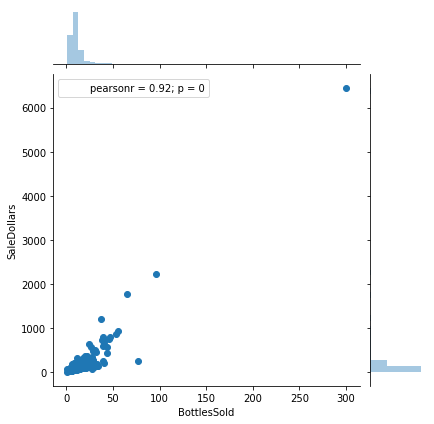

In [26]:
# graphing relationship between mean Bottles Sold per store and mean Sale total per store
# seaborn's jointplot provides a scatter of my variables, histograms, and a pearson correlation coefficient

liquor_grouped_mean = liquor.groupby('StoreNumber').mean()

sns.jointplot(x='BottlesSold',y='SaleDollars',data=liquor_grouped_mean)
plt.show()

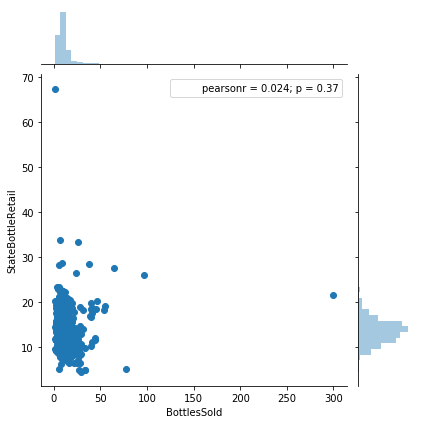

In [27]:
# graphing relationship between mean Bottles Sold per store and mean Bottle Retail price per store
sns.jointplot(x='BottlesSold',y='StateBottleRetail',data=liquor_grouped_mean)
plt.show()

count    1400.000000
mean       13.638091
std         3.314978
min         4.515000
25%        11.663636
50%        13.551636
75%        15.225041
max        67.490000
Name: StateBottleRetail, dtype: float64

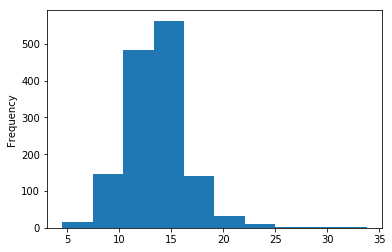

In [28]:
# histogram of average bottle retail price
liquor_grouped_mean[liquor_grouped_mean.StateBottleRetail <= 50].StateBottleRetail.plot(kind='hist')

liquor_grouped_mean.StateBottleRetail.describe()

### Finding #1

The top five categories of liquor sold by volume and sales do not match. However, the most popular (top 3) are the same categories, just in variant orders - vodka 80 proof, Canadian whiskies, and spiced rum.  

In [29]:
# Highest number of sales and dollar value by Category 

liquor_grouped_sum = liquor.groupby('CategoryName').sum()

In [30]:
liquor_grouped_sum.sort_values(by='VolumeSoldLiters', ascending=False).head(5).drop(['StoreNumber', 'CountyNumber', 'ZipCode', 'Category', 'VendorNumber', 'ItemNumber'], axis=1)

,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
CategoryName,,,,,,,
VODKA 80 PROOF,37034225,222546.69,334277.17,517504,4208811.41,496240.08,131098.13
CANADIAN WHISKIES,26211875,256792.71,386178.18,324049,4408768.86,337484.79,89160.60
SPICED RUM,14240750,141164.82,211816.57,178303,2727704.47,177195.07,46811.14
WHISKEY LIQUEUR,11848400,129038.19,193600.92,134824,1797053.44,107029.46,28280.98
BLENDED WHISKIES,12034350,78717.99,118113.91,107344,978413.11,102742.67,27137.56


In [31]:
liquor_grouped_sum.sort_values(by='SaleDollars', ascending=False).head(5).drop(['StoreNumber', 'CountyNumber', 'ZipCode', 'Category', 'VendorNumber', 'ItemNumber'], axis=1)

,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
CategoryName,,,,,,,
CANADIAN WHISKIES,26211875,256792.71,386178.18,324049,4408768.86,337484.79,89160.60
VODKA 80 PROOF,37034225,222546.69,334277.17,517504,4208811.41,496240.08,131098.13
SPICED RUM,14240750,141164.82,211816.57,178303,2727704.47,177195.07,46811.14
IMPORTED VODKA,9699350,143477.58,215274.83,101680,2079010.43,97416.76,25738.51
STRAIGHT BOURBON WHISKIES,13961100,182454.67,274165.42,111483,1923907.85,102390.50,27049.00


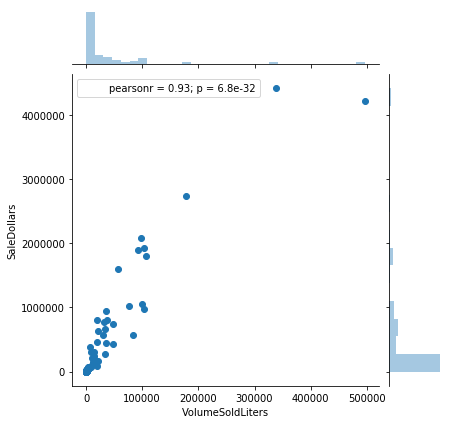

In [32]:
sns.jointplot(x='VolumeSoldLiters', y='SaleDollars',data=liquor_grouped_sum)
plt.show()

### Finding #2

The dataset I created by summing all relevant quantitative values has a relatively high correlation matrix across all variables. This should be expected as it is a time-series sum of sales data. I should be aware of collinearity throughout my analysis.

In [33]:
liquor_grouped_sum.drop(['StoreNumber', 'CountyNumber', 'ZipCode', 'Category', 'VendorNumber', 'ItemNumber'], axis=1, inplace=True)

In [34]:
liquor_grouped_sum

,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
CategoryName,,,,,,,
100 PROOF VODKA,3690500,19292.99,28954.42,33566,274591.07,34309.46,9063.30
AMARETTO - IMPORTED,2250,93.39,140.10,48,2241.60,36.00,9.52
AMERICAN ALCOHOL,429750,5077.12,7615.88,5773,76653.47,4329.75,1144.76
AMERICAN AMARETTO,1251800,6096.78,9148.14,10501,67229.50,9697.30,2562.08
AMERICAN COCKTAILS,10826325,49724.89,74915.47,53302,571592.95,82927.67,21891.50
AMERICAN DRY GINS,6498925,38702.90,58120.19,63100,438441.44,48082.68,12699.31
AMERICAN GRAPE BRANDIES,4380925,35766.37,53733.76,74021,440789.54,35474.98,9375.57
AMERICAN SLOE GINS,143500,847.53,1271.79,809,6194.65,704.50,186.17
ANISETTE,26250,165.75,248.78,138,984.58,103.50,27.40


In [35]:
liquor_grouped_sum.corr()

,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
BottleVolumeml,1.000000,0.901172,0.901348,0.974387,0.939244,0.975870,0.975865
StateBottleCost,0.901172,1.000000,0.999999,0.857618,0.961976,0.844095,0.844125
StateBottleRetail,0.901348,0.999999,1.000000,0.857749,0.962022,0.844286,0.844316
BottlesSold,0.974387,0.857618,0.857749,1.000000,0.935143,0.993177,0.993189
SaleDollars,0.939244,0.961976,0.962022,0.935143,1.000000,0.930883,0.930908
VolumeSoldLiters,0.975870,0.844095,0.844286,0.993177,0.930883,1.000000,1.000000
VolumeSoldGallons,0.975865,0.844125,0.844316,0.993189,0.930908,1.000000,1.000000


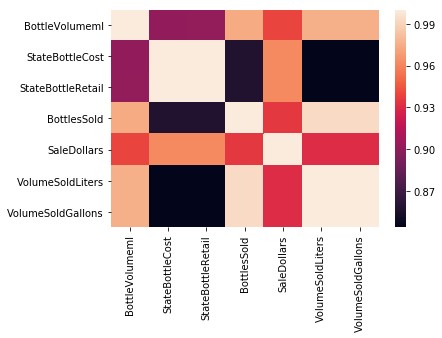

In [36]:
sns.heatmap(liquor_grouped_sum.corr())

### Finding #3

There are a handful of 'superstores' that are exceeding 400,000 USD in sales for FY2015. The vast majority of liquor stores have sales under $200k. The total volume sold by stores are good proxies for sales as well. The more a store sold in volume, the more it received in sales.  

In [37]:
liquor_grouped_store = liquor.groupby('StoreNumber').sum()

In [38]:
liquor_grouped_store

,ZipCode,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
StoreNumber,,,,,,,,,,,,
2106,33100902.0,4578.0,6.862145e+08,175772,41476697,597350,6753.92,10138.83,12587,176849.97,11849.60,3130.85
2113,9299912.0,17296.0,1.912071e+08,43223,8195266,175625,1994.22,2993.26,830,11376.12,836.85,221.03
2130,25807827.0,3563.0,5.326921e+08,129922,26075132,476375,5099.22,7651.68,9156,139727.54,8448.27,2231.98
2152,8630199.0,2737.0,1.780288e+08,40771,6760500,181500,1461.46,2198.51,709,9097.51,773.50,204.29
2178,15390740.0,885.0,3.079832e+08,70428,14061026,302875,2833.94,4257.50,2408,29912.68,2437.92,644.09
2190,81810564.0,125202.0,1.693124e+09,408846,96498626,1305625,19133.54,28723.00,13678,156204.75,7839.63,2072.73
2191,38895048.0,41384.0,7.776921e+08,196592,36999109,730975,8504.94,12760.23,10306,172431.69,10981.44,2901.12
2200,24532755.0,39285.0,5.061255e+08,116612,20337241,539500,5447.94,8179.00,1930,26986.42,2136.02,564.26
2205,14870016.0,21024.0,3.015568e+08,73034,11873486,253350,2926.01,4394.46,1882,24681.39,1556.91,411.31


In [39]:
liquor_grouped_store.drop(['ZipCode','CountyNumber','Category','VendorNumber','ItemNumber'],axis=1,inplace=True)

In [40]:
liquor_grouped_store.sort_values(by='SaleDollars', ascending=False).head(10)

,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
StoreNumber,,,,,,,
2633,2278300,30020.76,45061.95,76756,1220335.09,75921.50,20057.78
4829,2109675,28777.11,43194.31,65719,1089152.87,63484.99,16772.70
2512,1609325,19235.77,28878.96,35679,532265.62,33397.94,8823.47
3385,644750,7188.85,10793.23,31737,506589.09,36232.50,9571.80
3420,472000,5496.02,8250.57,23784,402576.06,28656.00,7570.33
3952,1044525,15107.13,22670.23,22754,392451.43,21745.26,5745.27
3814,150000,2414.03,3622.75,13388,310536.40,16252.50,4293.54
3773,1081425,16429.26,24650.52,16899,298663.20,16198.82,4278.67
3354,430000,4833.12,7256.57,17961,295593.30,21279.75,5621.65


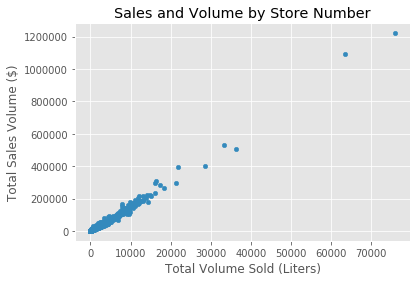

In [41]:
plt.style.use('ggplot')
liquor_grouped_store.plot(x='VolumeSoldLiters', y='SaleDollars', kind='scatter', title='Sales and Volume by Store Number')
plt.xlabel('Total Volume Sold (Liters)')
plt.ylabel('Total Sales Volume ($)')


### Finding #4

There do not seem to be any major outliers within our dataset when grouped by store location, liquor type, or Zip Code. Meaning, that the volume sold and prices sold do not indicate anything too bizarre, by store location, liquor, or area code. However, more should be investigated into perhaps by segmenting the type of liquor further, or by county area.   

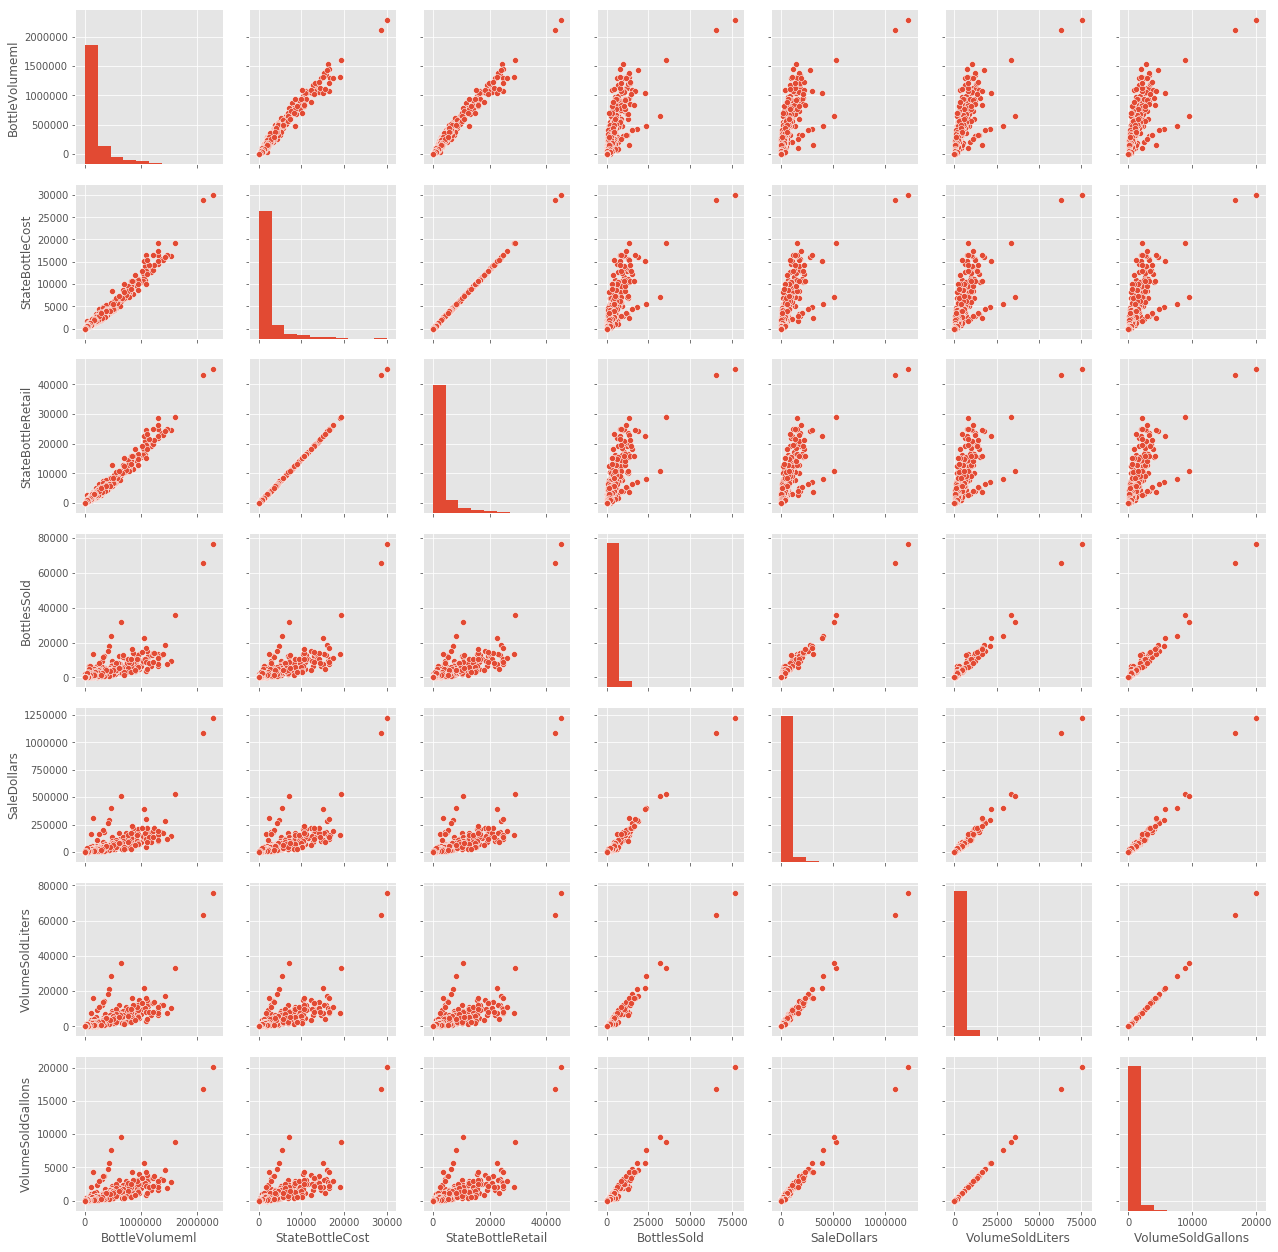

In [42]:
sns.pairplot(liquor_grouped_store)

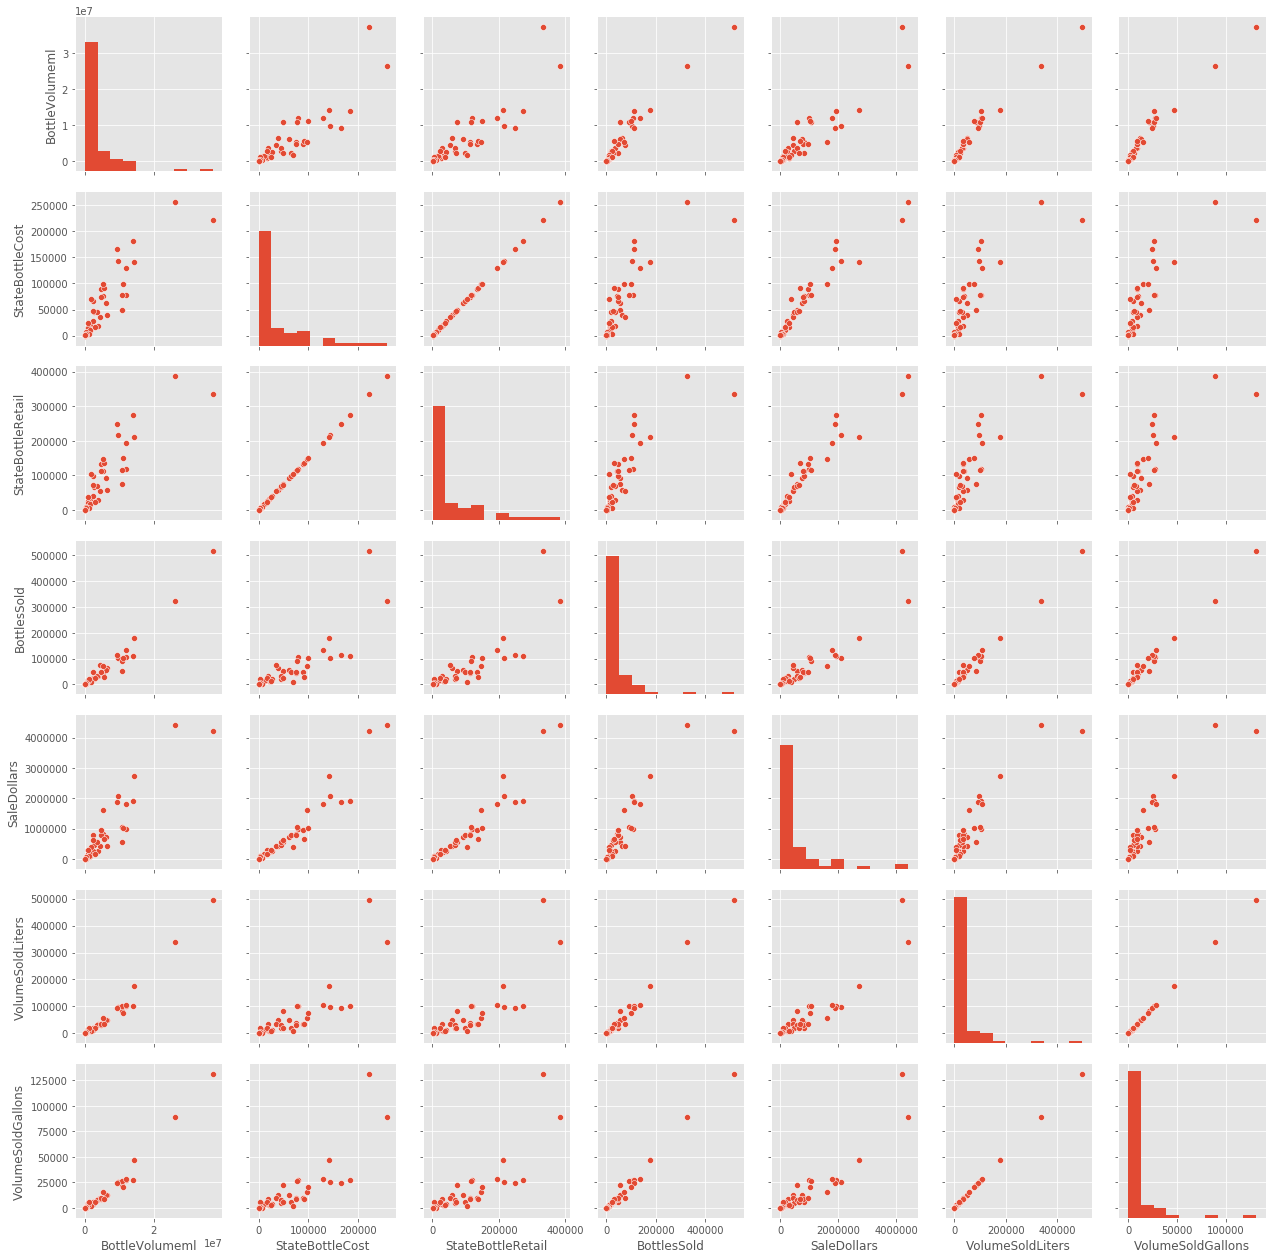

In [43]:
sns.pairplot(liquor_grouped_sum)

In [48]:
liquor_grouped_zip = liquor.groupby('ZipCode').sum()

In [50]:
liquor_grouped_zip.drop(['StoreNumber','CountyNumber','Category','VendorNumber','ItemNumber'], axis=1, inplace=True)

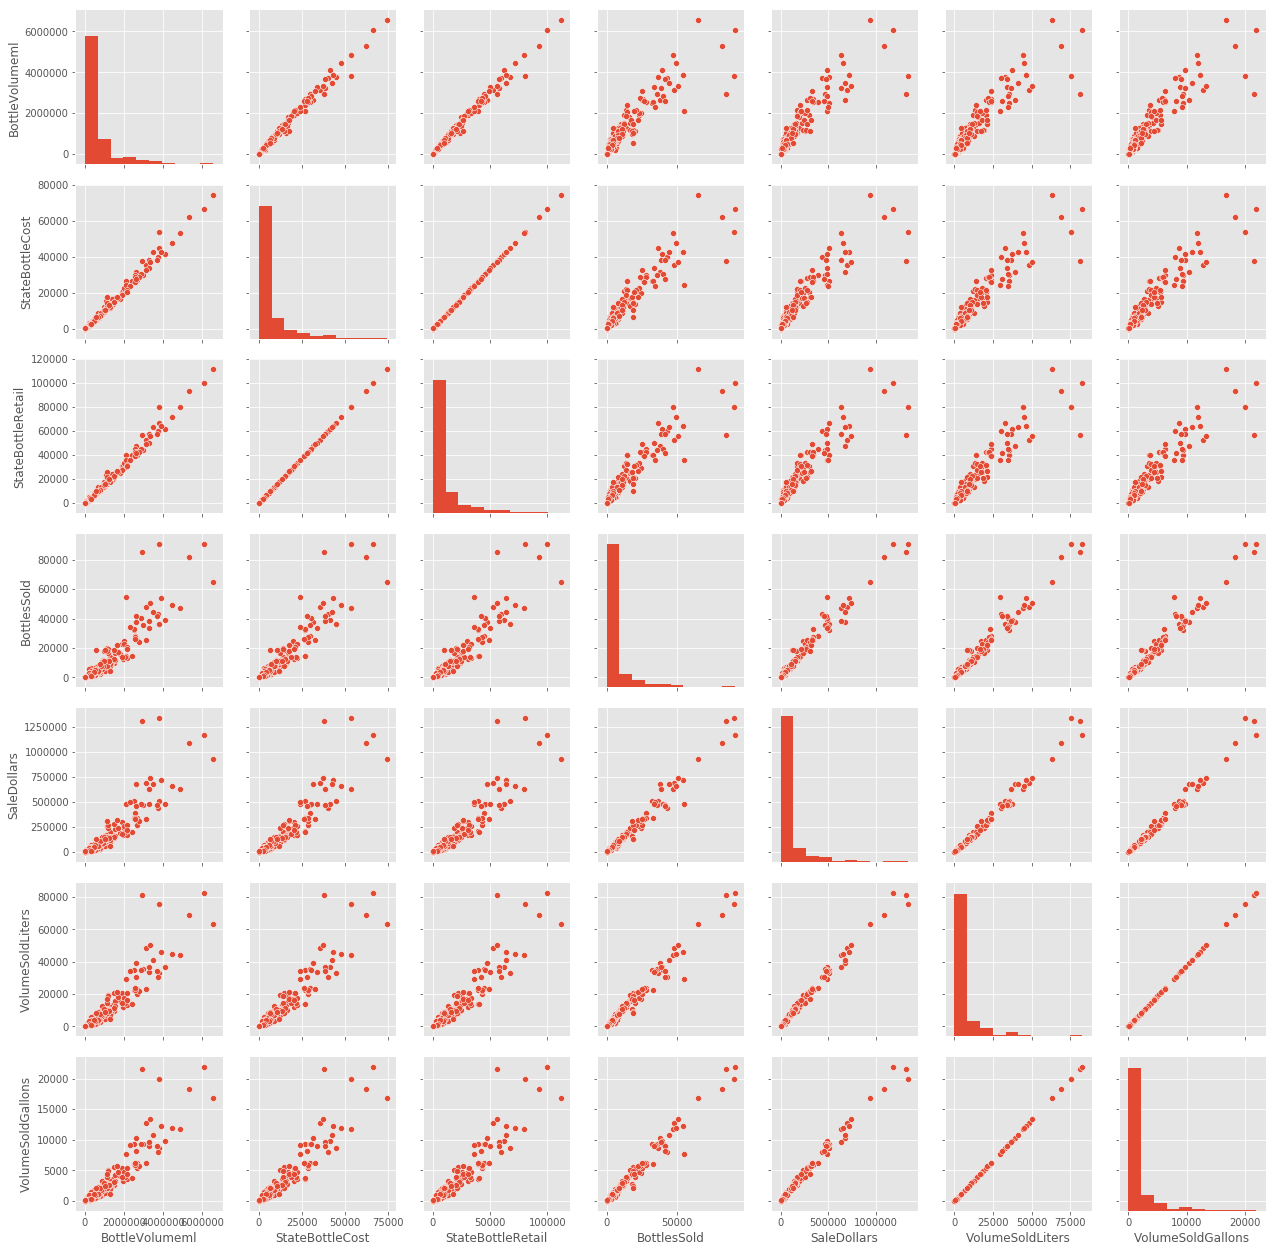

In [52]:
sns.pairplot(liquor_grouped_zip)

### Finding #5

We can see that total profit does not equal to profitability. There is an obvious direct relationship between sales and profit, and no absurdly unprofitable or profitable liquor type, either. Profit margins for liquor types are also extremely tight. The 'most' profitable liquor type, Barbados Rum, is 33.8%. The least, is Spearmint Schnapps, at 33.3%. That is merely 5 basis points, and meaning all other liquor type profitability percentages are within 5 bps of each other, at most. 

In [58]:
liquor['Profit'] = (liquor.StateBottleRetail - liquor.StateBottleCost) * liquor.BottlesSold
liquor

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Profit
0,2015-11-04,3717,SUMNER,50674.0,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,27.00
1,2016-03-02,2614,DAVENPORT,52807.0,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,13.76
2,2016-02-11,2106,CEDAR FALLS,50613.0,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34,151.20
3,2016-02-03,2501,AMES,50010.0,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77,28.50
4,2015-08-18,3654,BELMOND,50421.0,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,43.20
5,2015-04-20,2569,CEDAR RAPIDS,52402.0,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,39.96
6,2015-08-05,2596,OTTUMWA,52501.0,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,9.99
7,2015-06-25,3456,CLEAR LAKE,50428.0,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,15.76
8,2016-01-04,4757,BONDURANT,50035.0,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79,23.00
9,2015-11-10,4346,SHELLSBURG,52332.0,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,7.62


In [82]:
liquor_group_profit = liquor.groupby('CategoryName').sum()

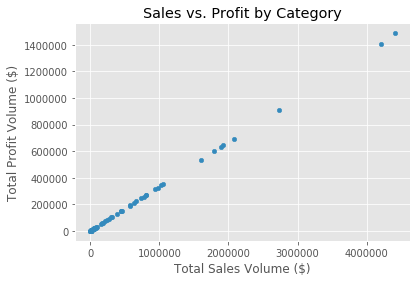

In [83]:
liquor_group_profit.plot(x='SaleDollars', y='Profit', kind='scatter', title='Sales vs. Profit by Category')
plt.xlabel('Total Sales Volume ($)')
plt.ylabel('Total Profit Volume ($)')

In [84]:
liquor_group_profit.sort_values(by='Profit',ascending=False)

,StoreNumber,ZipCode,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Profit
CategoryName,,,,,,,,,,,,,,
CANADIAN WHISKIES,101025255,1.384206e+09,1502180.0,2.741475e+10,4671070,343180854,26211875,256792.71,386178.18,324049,4408768.86,337484.79,89160.60,1486013.93
VODKA 80 PROOF,131674011,1.811887e+09,2025056.0,3.647239e+10,10469130,1308890352,37034225,222546.69,334277.17,517504,4208811.41,496240.08,131098.13,1407589.21
SPICED RUM,54533530,7.495154e+08,828139.0,1.554266e+10,3861726,617356595,14240750,141164.82,211816.57,178303,2727704.47,177195.07,46811.14,909686.97
IMPORTED VODKA,38890324,5.467739e+08,616418.0,1.101023e+10,2438912,386412529,9699350,143477.58,215274.83,101680,2079010.43,97416.76,25738.51,693318.82
STRAIGHT BOURBON WHISKIES,53471052,7.859805e+08,883707.0,1.551383e+10,2584042,493187743,13961100,182454.67,274165.42,111483,1923907.85,102390.50,27049.00,643877.72
TEQUILA,42853702,6.203730e+08,696931.0,1.237661e+10,4082924,1083023289,9229875,166144.07,249349.34,113300,1886724.18,92889.61,24546.93,629559.83
WHISKEY LIQUEUR,40694782,5.583119e+08,637830.0,1.179160e+10,3347772,787608512,11848400,129038.19,193600.92,134824,1797053.44,107029.46,28280.98,599345.50
TENNESSEE WHISKIES,26493047,3.626256e+08,406520.0,7.161015e+09,638813,288955499,5314175,98129.18,147175.47,72583,1598605.37,57697.15,15243.85,532966.24
PUERTO RICO & VIRGIN ISLANDS RUM,36056618,5.154157e+08,576151.0,1.068786e+10,2061362,449599279,10906225,77846.46,116939.86,92110,1046370.81,99956.72,26400.51,349717.80


In [85]:
liquor_group_profit['Profitability'] = liquor_group_profit.Profit / liquor_group_profit.SaleDollars

In [86]:
liquor_group_profit.sort_values(by='Profitability',ascending=False)

,StoreNumber,ZipCode,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,Profit,Profitability
CategoryName,,,,,,,,,,,,,,,
BARBADOS RUM,1227863,2.012309e+07,23729.0,4.173856e+08,130244,19307803,294750,3998.18,6030.26,1697,25555.06,1272.75,336.52,8639.47,0.338073
CANADIAN WHISKIES,101025255,1.384206e+09,1502180.0,2.741475e+10,4671070,343180854,26211875,256792.71,386178.18,324049,4408768.86,337484.79,89160.60,1486013.93,0.337059
AMERICAN COCKTAILS,23216595,3.549774e+08,393791.0,7.421652e+09,1870994,415465486,10826325,49724.89,74915.47,53302,571592.95,82927.67,21891.50,192226.29,0.336299
VODKA FLAVORED,49014838,7.170664e+08,817747.0,1.443783e+10,4342663,713732806,11052975,99911.72,150264.22,100601,1020099.57,75677.56,19997.07,341881.63,0.335145
DISTILLED SPIRITS SPECIALTY,4673102,7.060093e+07,81470.0,1.492746e+09,482895,104941972,1081350,13849.96,20855.20,17899,177984.57,16532.59,4368.58,59624.49,0.334998
STRAIGHT BOURBON WHISKIES,53471052,7.859805e+08,883707.0,1.551383e+10,2584042,493187743,13961100,182454.67,274165.42,111483,1923907.85,102390.50,27049.00,643877.72,0.334672
JAMAICA RUM,1192970,1.973705e+07,22808.0,4.089085e+08,130486,25049444,309250,4224.57,6350.17,1995,33904.68,1680.25,444.11,11343.60,0.334573
VODKA 80 PROOF,131674011,1.811887e+09,2025056.0,3.647239e+10,10469130,1308890352,37034225,222546.69,334277.17,517504,4208811.41,496240.08,131098.13,1407589.21,0.334439
PUERTO RICO & VIRGIN ISLANDS RUM,36056618,5.154157e+08,576151.0,1.068786e+10,2061362,449599279,10906225,77846.46,116939.86,92110,1046370.81,99956.72,26400.51,349717.80,0.334220


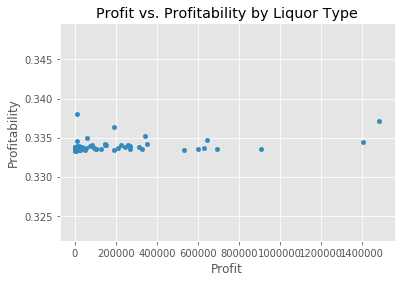

In [92]:
liquor_group_profit.plot(x='Profit', y='Profitability', kind='scatter', title='Profit vs. Profitability by Liquor Type')
